In [20]:
#https://www.kaggle.com/rochellesilva/simple-tutorial-for-beginners
#https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [21]:
dataset= pd.read_csv("train.csv")

In [22]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Class

In [23]:
survived_class = dataset[dataset['Survived']==1]['Pclass'].value_counts()
survived_class.head()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [24]:
dead_class = dataset[dataset['Survived']==0]['Pclass'].value_counts()
dead_class.head()

3    372
2     97
1     80
Name: Pclass, dtype: int64

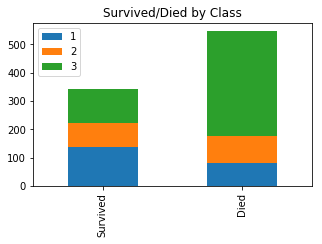

In [25]:
df_class = pd.DataFrame([survived_class,dead_class])
df_class.index = ['Survived','Died']
df_class.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Class")

## Sex

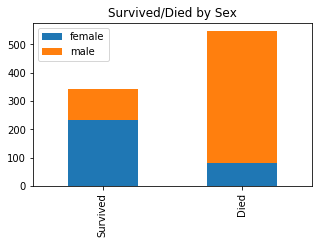

In [26]:
Survived = dataset[dataset.Survived == 1]['Sex'].value_counts()
Died = dataset[dataset.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([Survived , Died])
df_sex.index = ['Survived','Died']
df_sex.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Sex")

## Embarked

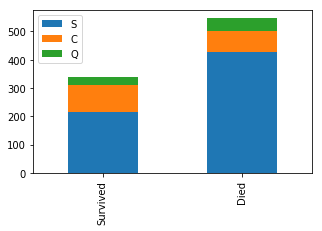

In [27]:
survived_embark = dataset[dataset['Survived']==1]['Embarked'].value_counts()
dead_embark = dataset[dataset['Survived']==0]['Embarked'].value_counts()
df_embark = pd.DataFrame([survived_embark,dead_embark])
df_embark.index = ['Survived','Died']
df_embark.plot(kind='bar',stacked=True, figsize=(5,3))

## Cleaning

In [28]:
X = dataset.drop(['PassengerId','Cabin','Ticket','Fare', 'Parch', 'SibSp'], axis=1)
y = X.Survived                       # vector of labels (dependent variable)
X=X.drop(['Survived'], axis=1)       # remove the dependent variable from the dataframe X

X.head(20)

,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,3,"Allen, Mr. William Henry",male,35.0,S
5,3,"Moran, Mr. James",male,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C


## Encode categorical data 

In [29]:
# encode "Sex"
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
X.Sex=labelEncoder_X.fit_transform(X.Sex)

In [11]:
X.head()

,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",1,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,C
2,3,"Heikkinen, Miss. Laina",0,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,S
4,3,"Allen, Mr. William Henry",1,35.0,S


In [30]:
# number of null values in embarked:
print ('Number of null values in Embarked:', sum(X.Embarked.isnull()))

Number of null values in Embarked: 2


In [31]:
row_index = X.Embarked.isnull()
X.loc[row_index,'Embarked']='S' 

In [32]:
# encode "Embarked"
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
X.Embarked=labelEncoder_X.fit_transform(X.Embarked)

In [33]:
X.head()

,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",1,22.0,2
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,0
2,3,"Heikkinen, Miss. Laina",0,26.0,2
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,2
4,3,"Allen, Mr. William Henry",1,35.0,2


In [34]:
#Drop Name
X=X.drop(['Name'], axis=1)
X=X.drop(['Age'], axis=1)
X.head()

,Pclass,Sex,Embarked
0,3,1,2
1,1,0,0
2,3,0,2
3,1,0,2
4,3,1,2


## Models

In [35]:
#-----------------------Logistic Regression---------------------------------------------
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Logistic Regression:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

Logistic Regression:
 Accuracy: 0.7811176370446034 +/- 0.025395923106421765 



In [36]:
#----------------------------Random Forest------------------------------------------

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())

Random Forest:
 Accuracy: 0.8114683350357508 +/- 0.029440244470430504
